Fundamentals of Signal Processing

Objective: To have basic knowledge of signals and understand the libraries for signal processing .

Learning outcomes (by the end of doing this lab the expectation is you will be able to….

LO1: Generate and visualize standard signals.

LO2: Apply and analyze sampling concepts, including aliasing.

LO3: Compare continuous and discrete signals.

LO4: Demonstrate time shifting and scaling of signals.

LO5: Combine and scale signals to observe superposition.

LO6: Simulate noise effects and apply filtering techniques.


(1) Generate and plot the following signals,

(a) A unit step function.

(b) A unit impulse function.

(c) A ramp function.

(d) An exponential signal (decaying and growing).

(e) A sinusoidal signal.

Write Python code to generate and plot each signal using matplotlib and numpy.


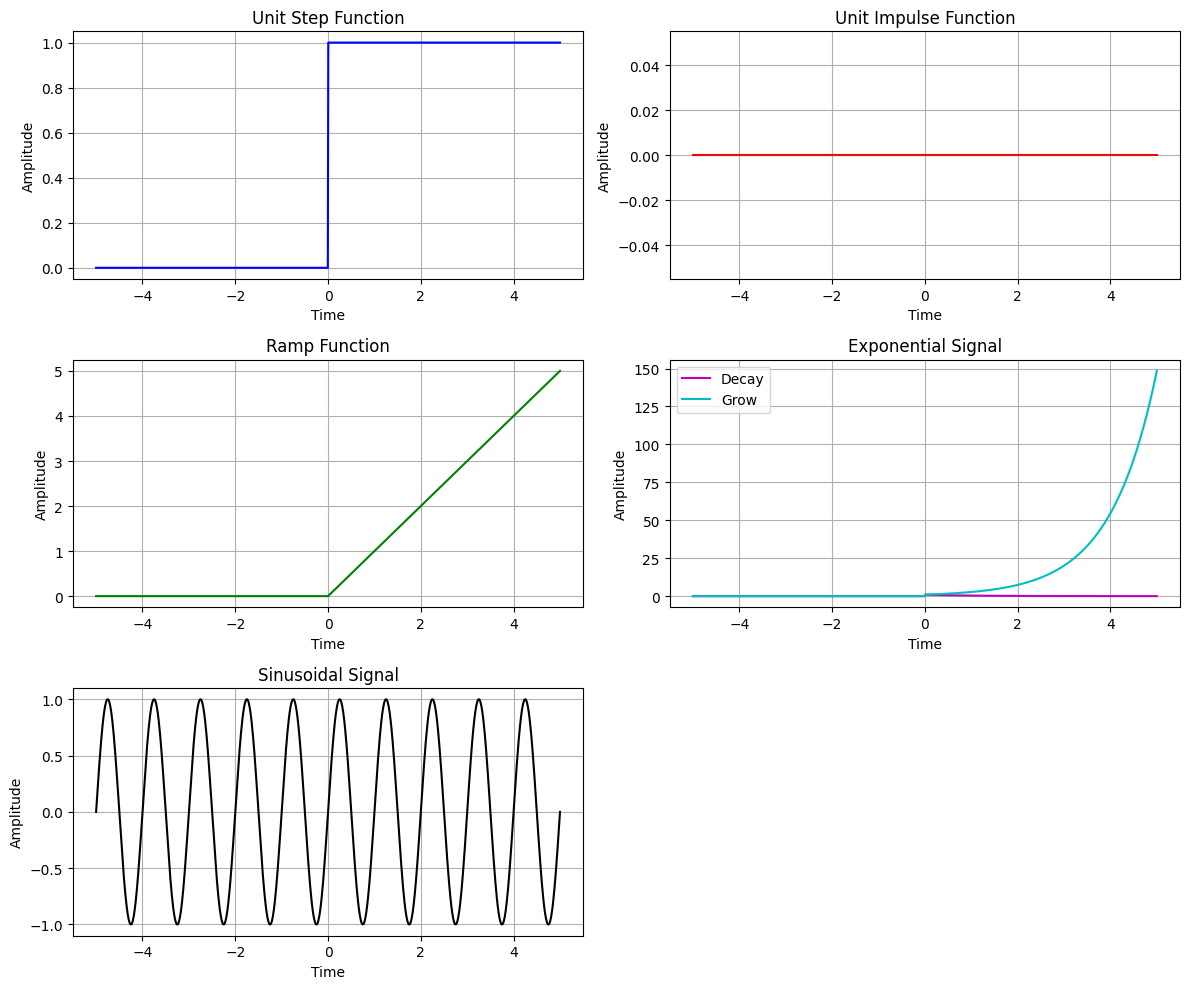

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(-5, 5, 1000)  # time vector

# (a) Unit Step Function
u = np.where(t >= 0, 1, 0)

# (b) Unit Impulse Function
impulse = np.where(t == 0, 1, 0)  # Only 1 at t=0

# (c) Ramp Function
ramp = np.where(t >= 0, t, 0)

# (d) Exponential Signal (decaying and growing)
exp_decay = np.exp(-t) * (t >= 0)   # decaying for t >= 0
exp_grow = np.exp(t) * (t >= 0)     # growing for t >= 0

# (e) Sinusoidal Signal
sinusoid = np.sin(2 * np.pi * 1 * t)  # frequency = 1 Hz

# Plotting all signals
plt.figure(figsize=(12, 10))

# Unit Step
plt.subplot(3, 2, 1)
plt.plot(t, u, 'b')
plt.title("Unit Step Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

# Unit Impulse
plt.subplot(3, 2, 2)
plt.plot(t, impulse, 'r')
plt.title("Unit Impulse Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

# Ramp Function
plt.subplot(3, 2, 3)
plt.plot(t, ramp, 'g')
plt.title("Ramp Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

# Exponential Decay
plt.subplot(3, 2, 4)
plt.plot(t, exp_decay, 'm', label="Decay")
plt.plot(t, exp_grow, 'c', label="Grow")
plt.title("Exponential Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Sinusoidal Signal
plt.subplot(3, 2, 5)
plt.plot(t, sinusoid, 'k')
plt.title("Sinusoidal Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

(2) You are asked to visualize the effects of sampling and reconstructing a continuous-time signal.

(a) Generate a continuous sinusoidal signal.

(b) Sample the signal at different rates (Nyquist rate, above, and below Nyquist).

(c) Reconstruct the sampled signal and observe the aliasing effect when undersampled.

(d) Plot the continuous signal, sampled points, and the reconstructed signal.


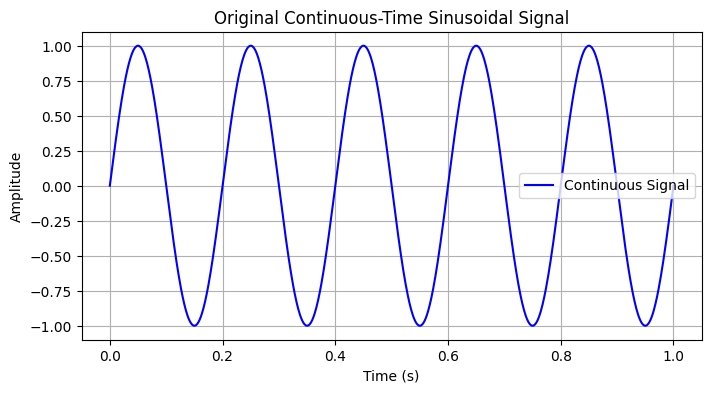

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the signal
f = 5  # frequency in Hz
t = np.linspace(0, 1, 1000)  # fine time vector for continuous signal
x = np.sin(2 * np.pi * f * t)  # continuous sinusoidal signal

# Plot the original signal
plt.figure(figsize=(8, 4))
plt.plot(t, x, 'b', label='Continuous Signal')
plt.title("Original Continuous-Time Sinusoidal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

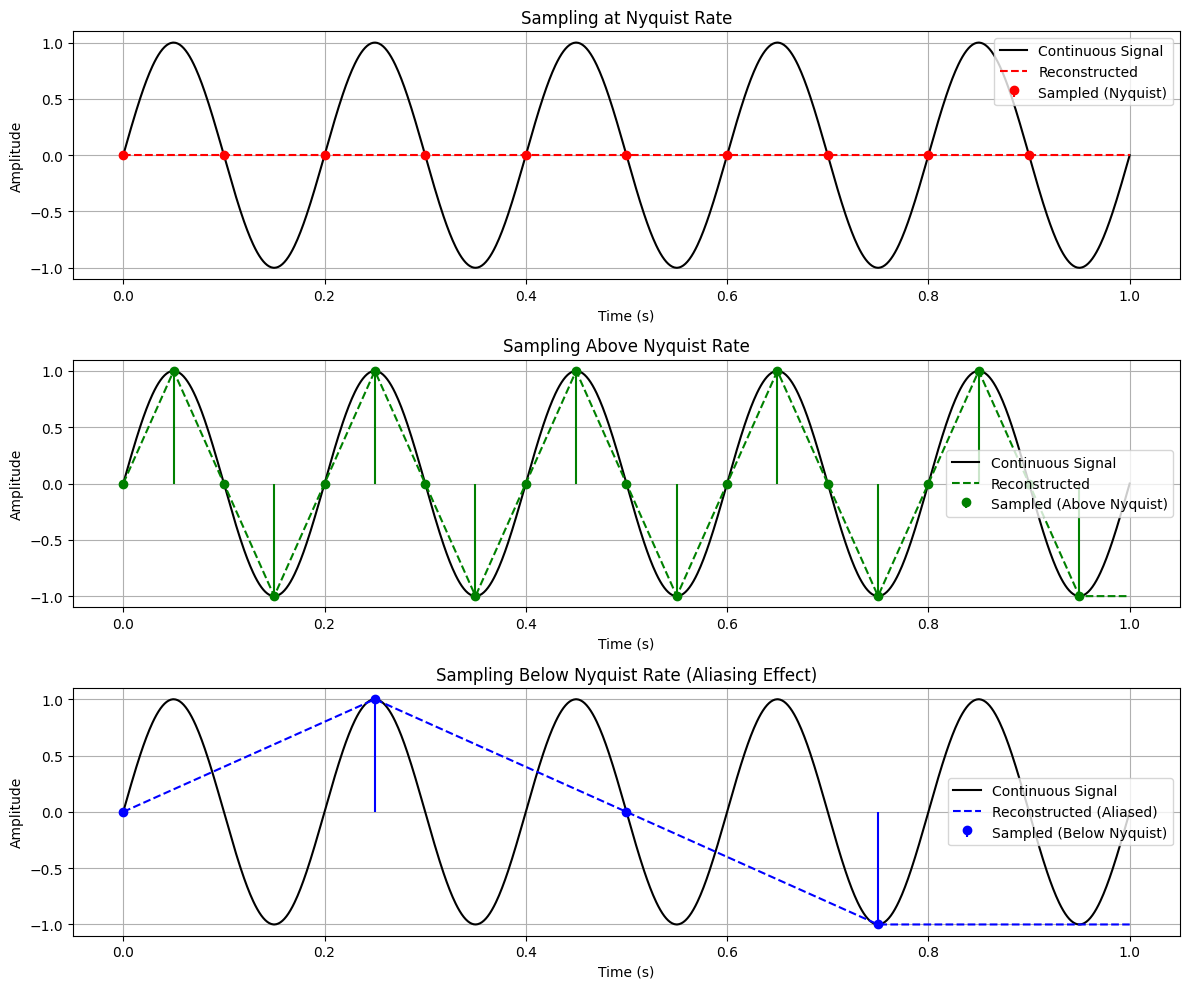

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a continuous sinusoidal signal
f = 5  # frequency of the sinusoid (Hz)
t_cont = np.linspace(0, 1, 1000)  # fine time vector for continuous signal
x_cont = np.sin(2 * np.pi * f * t_cont)  # continuous signal

# Nyquist rate = 2 * f
fs_nyquist = 2 * f
fs_above = 4 * f   # Above Nyquist rate
fs_below = 0.8 * f # Below Nyquist rate (undersampling)

# (b) Sample the signal at different rates
t_nyquist = np.arange(0, 1, 1/fs_nyquist)
x_nyquist = np.sin(2 * np.pi * f * t_nyquist)

t_above = np.arange(0, 1, 1/fs_above)
x_above = np.sin(2 * np.pi * f * t_above)

t_below = np.arange(0, 1, 1/fs_below)
x_below = np.sin(2 * np.pi * f * t_below)

# (c) Reconstruct the signals using interpolation
t_recon = t_cont  # for smooth reconstruction
x_recon_nyquist = np.interp(t_recon, t_nyquist, x_nyquist)
x_recon_above = np.interp(t_recon, t_above, x_above)
x_recon_below = np.interp(t_recon, t_below, x_below)

# (d) Plotting
plt.figure(figsize=(12, 10))

# Original Continuous Signal
plt.subplot(3, 1, 1)
plt.plot(t_cont, x_cont, 'k', label='Continuous Signal')
plt.stem(t_nyquist, x_nyquist, linefmt='r-', markerfmt='ro', basefmt=" ", label='Sampled (Nyquist)')
plt.plot(t_recon, x_recon_nyquist, 'r--', label='Reconstructed')
plt.title("Sampling at Nyquist Rate")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Above Nyquist Rate
plt.subplot(3, 1, 2)
plt.plot(t_cont, x_cont, 'k', label='Continuous Signal')
plt.stem(t_above, x_above, linefmt='g-', markerfmt='go', basefmt=" ", label='Sampled (Above Nyquist)')
plt.plot(t_recon, x_recon_above, 'g--', label='Reconstructed')
plt.title("Sampling Above Nyquist Rate")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Below Nyquist Rate (Aliasing)
plt.subplot(3, 1, 3)
plt.plot(t_cont, x_cont, 'k', label='Continuous Signal')
plt.stem(t_below, x_below, linefmt='b-', markerfmt='bo', basefmt=" ", label='Sampled (Below Nyquist)')
plt.plot(t_recon, x_recon_below, 'b--', label='Reconstructed (Aliased)')
plt.title("Sampling Below Nyquist Rate (Aliasing Effect)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

(3) Generate and plot a sinusoidal signal with amplitude = 1, frequency = 5 Hz, and duration = 1 second. Plot both the continuous and discrete versions of the signal.


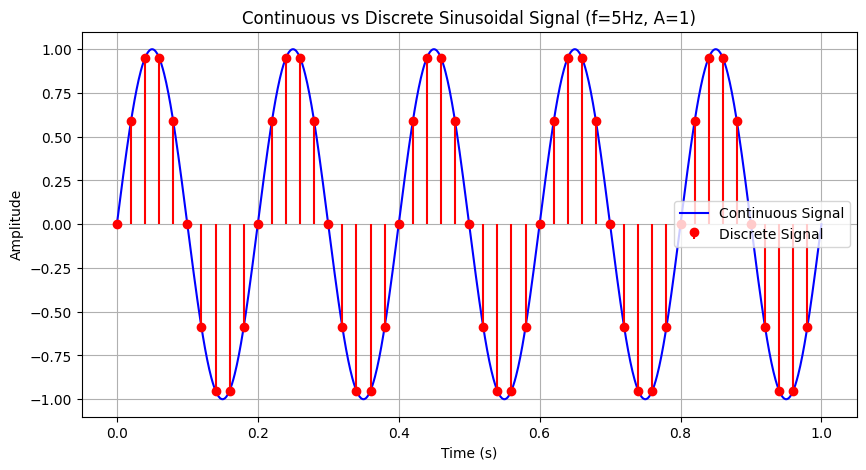

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1          # Amplitude
f = 5          # Frequency in Hz
duration = 1   # Duration in seconds
fs = 50        # Sampling frequency for discrete signal (50 Hz)

# Time vectors
t_cont = np.linspace(0, duration, 1000)     # Fine time steps for continuous signal
t_disc = np.arange(0, duration, 1/fs)       # Discrete sampling points

# Signals
x_cont = A * np.sin(2 * np.pi * f * t_cont)  # Continuous signal
x_disc = A * np.sin(2 * np.pi * f * t_disc)  # Discrete signal

# Plotting
plt.figure(figsize=(10, 5))

# Continuous signal
plt.plot(t_cont, x_cont, 'b', label='Continuous Signal')

# Discrete signal
plt.stem(t_disc, x_disc, linefmt='r-', markerfmt='ro', basefmt=" ", label='Discrete Signal')

# Labels and title
plt.title("Continuous vs Discrete Sinusoidal Signal (f=5Hz, A=1)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

(4) Write a Python program to demonstrate the effects of time shifting and time scaling on a signal.

(a) Generate a unit step function.

(b) Perform time shifting (delaying or advancing the signal).

(c) Perform time scaling (compressing or expanding the signal).

(d) Plot the original and transformed signals.

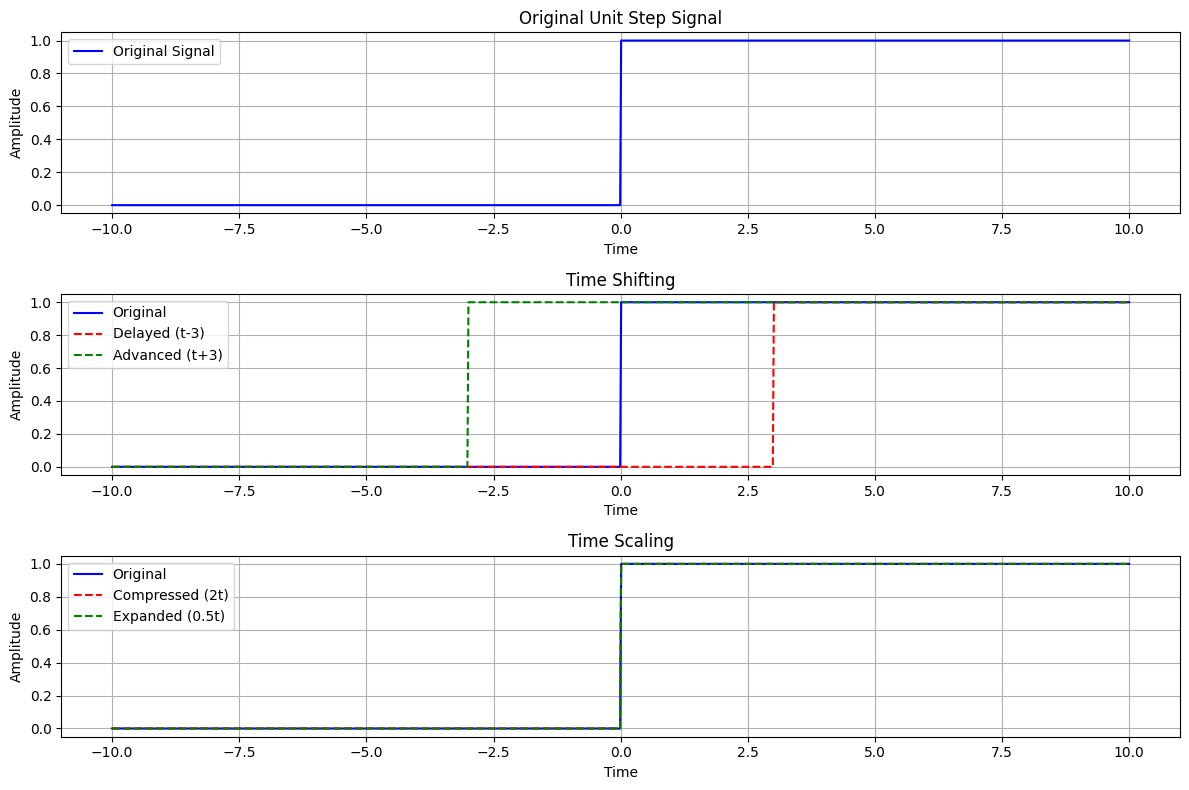

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a unit step function
t = np.linspace(-10, 10, 1000)             # time axis
u = np.where(t >= 0, 1, 0)                 # unit step signal

# (b) Time Shifting
shift_delay = 3                            # delay by 3 units
shift_advance = -3                         # advance by 3 units
u_delay = np.where(t - shift_delay >= 0, 1, 0)
u_advance = np.where(t - shift_advance >= 0, 1, 0)

# (c) Time Scaling
scale_compress = 2                         # compression factor
scale_expand = 0.5                         # expansion factor
u_compress = np.where(t*scale_compress >= 0, 1, 0)
u_expand = np.where(t*scale_expand >= 0, 1, 0)

# (d) Plot original and transformed signals
plt.figure(figsize=(12, 8))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(t, u, 'b', label='Original Signal')
plt.title("Original Unit Step Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Time Shifting
plt.subplot(3, 1, 2)
plt.plot(t, u, 'b', label='Original')
plt.plot(t, u_delay, 'r--', label='Delayed (t-3)')
plt.plot(t, u_advance, 'g--', label='Advanced (t+3)')
plt.title("Time Shifting")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Time Scaling
plt.subplot(3, 1, 3)
plt.plot(t, u, 'b', label='Original')
plt.plot(t, u_compress, 'r--', label='Compressed (2t)')
plt.plot(t, u_expand, 'g--', label='Expanded (0.5t)')
plt.title("Time Scaling")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

(5) Write a Python program to perform the following:

(a) Generate two sinusoidal signals with different frequencies and amplitudes.

(b) Add the signals together and plot the result.

(c) Scale one of the signals and observe the effect.


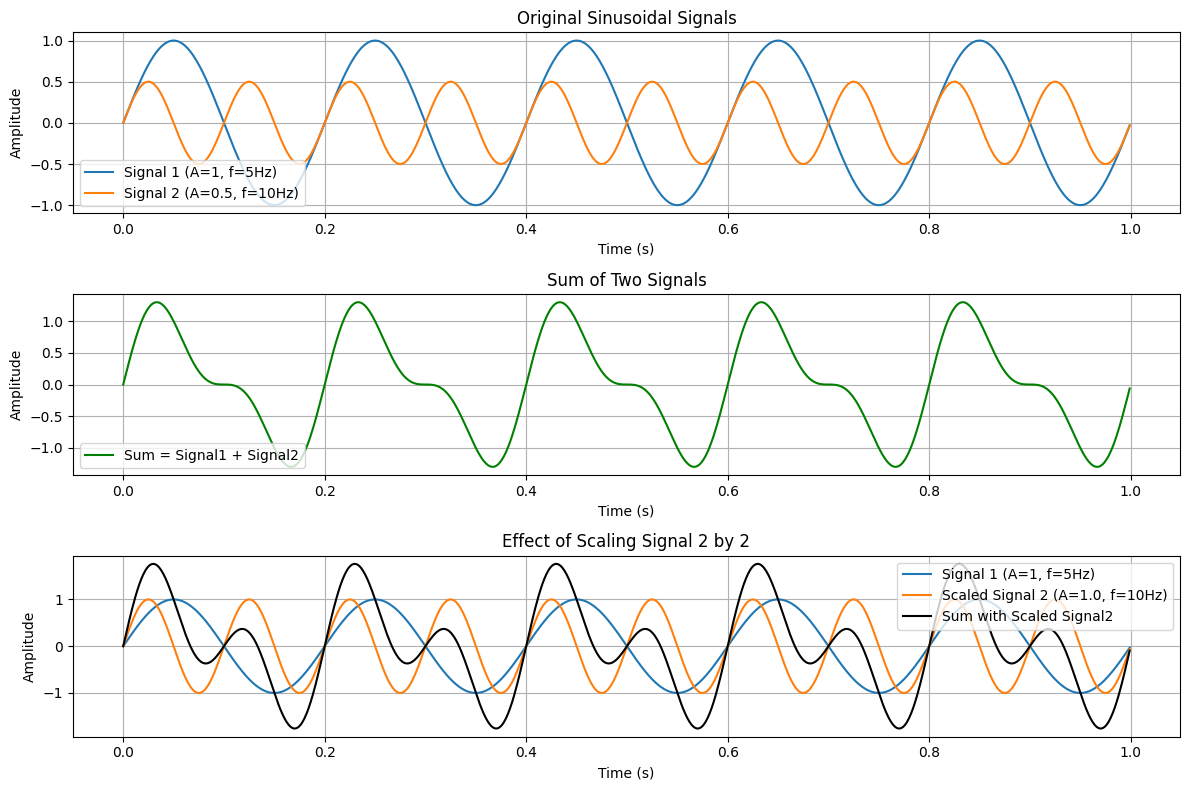

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate two sinusoidal signals
A1, f1 = 1, 5       # Amplitude=1, Frequency=5 Hz
A2, f2 = 0.5, 10    # Amplitude=0.5, Frequency=10 Hz
duration = 1        # 1 second
fs = 1000           # Sampling frequency

t = np.linspace(0, duration, fs, endpoint=False)
signal1 = A1 * np.sin(2 * np.pi * f1 * t)
signal2 = A2 * np.sin(2 * np.pi * f2 * t)

# (b) Add the signals
sum_signal = signal1 + signal2

# (c) Scale one of the signals
scale_factor = 2
scaled_signal2 = scale_factor * signal2
scaled_sum = signal1 + scaled_signal2

# Plotting
plt.figure(figsize=(12, 8))

# Original signals
plt.subplot(3, 1, 1)
plt.plot(t, signal1, label='Signal 1 (A=1, f=5Hz)')
plt.plot(t, signal2, label='Signal 2 (A=0.5, f=10Hz)')
plt.title("Original Sinusoidal Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Sum of signals
plt.subplot(3, 1, 2)
plt.plot(t, sum_signal, 'g', label='Sum = Signal1 + Signal2')
plt.title("Sum of Two Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Scaled signal and sum
plt.subplot(3, 1, 3)
plt.plot(t, signal1, label='Signal 1 (A=1, f=5Hz)')
plt.plot(t, scaled_signal2, label='Scaled Signal 2 (A=1.0, f=10Hz)')
plt.plot(t, scaled_sum, 'k', label='Sum with Scaled Signal2')
plt.title(f"Effect of Scaling Signal 2 by {scale_factor}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

(6) Write a Python program to perform noise addition and filtering.

(a) Generate a clean sinusoidal signal.

(b) Add random Gaussian noise to the signal.

(c) Apply a low-pass filter and plot the filtered signal.


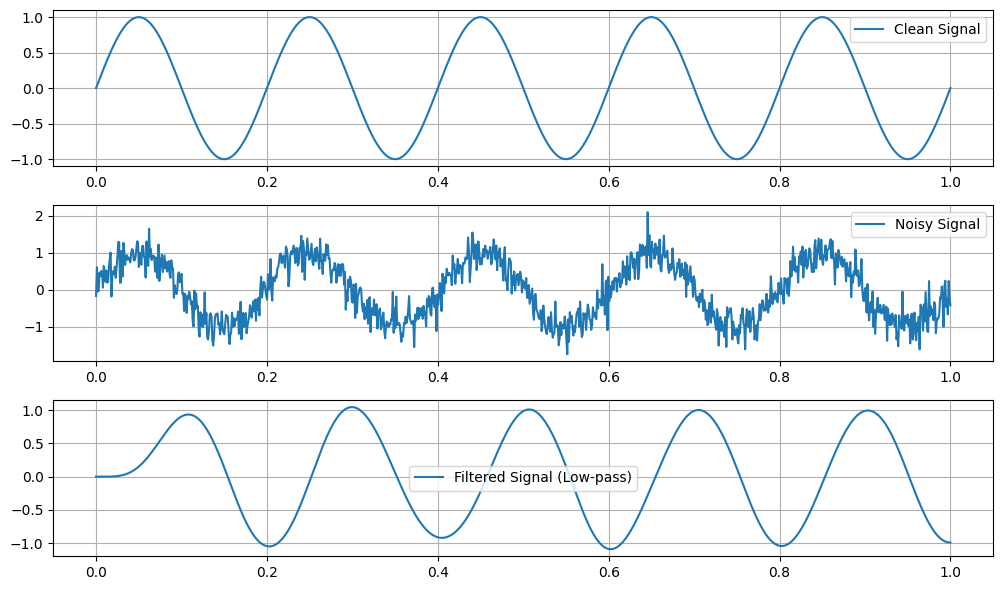

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# --- Step 1: Generate a clean sinusoidal signal ---
fs = 1000            # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector (1 second)
freq = 5             # Frequency of the sine wave
clean_signal = np.sin(2 * np.pi * freq * t)

# --- Step 2: Add Gaussian noise ---
noise = np.random.normal(0, 0.3, clean_signal.shape)
noisy_signal = clean_signal + noise

# --- Step 3: Apply a low-pass filter ---
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    y = lfilter(b, a, data)
    return y

cutoff = 10  # Cutoff frequency
filtered_signal = lowpass_filter(noisy_signal, cutoff, fs)

# --- Step 4: Plot the signals ---
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, label="Clean Signal")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label="Filtered Signal (Low-pass)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()